<a href="https://www.kaggle.com/code/prasadposture121/exploratory-data-analysis-of-ipl-matches?scriptVersionId=113308987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1> Exploratory Data Analysis of IPL Matches(2008-2020) </h1>

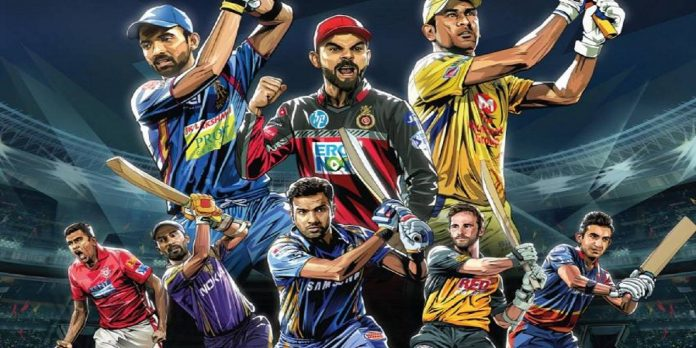

## Introduction
Cricket is the most popular sport in India. There are various formats of this game and the most loved is the IPL. In this project, I'm trying to analyze the data related to IPL matches from year 2008 to 2020. My aim will be to draw useful insights and look out for the major factors that help teams win the matches. I will be using pandas & numpy for data manipulation and matplotlib & seaborn for data visualization. I learned all these things for free from a course offered by `jovian.ml` and doing this project under that course. Here is the link for that course: [Data Analysis with Python: Zero to Pandas](zerotopandas.com)

In [1]:
#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

# Data Preparation and Cleaning
This the crucial step in data analysis. We have to make sure that there are no missing values or outliers in the data which will potentially trouble us while drawing the insights.

#### We will first load, prepare and clean the `IPL matches` data

In [2]:
#importing the pandas library
import pandas as pd

#loading the data
df=pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
#number of rows and columns
df.shape

(816, 17)

In [4]:
#getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
#parsing the dates
df['date'] = pd.to_datetime(df.date)
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day
df['weekday'] = pd.DatetimeIndex(df.date).weekday

In [6]:
#getting the sum of missing values for each attribute
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
year                 0
month                0
day                  0
weekday              0
dtype: int64

In [7]:
#since there are no missing values in venue we can use that to fill in the city
df[df['city'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,year,month,day,weekday
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,wickets,8.0,N,NaN,Aleem Dar,S Ravi,2014,4,17,3
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,...,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary,2014,4,19,5
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,...,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,19,5
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,...,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014,4,20,6
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,...,runs,72.0,N,NaN,M Erasmus,S Ravi,2014,4,22,1
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,...,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth,2014,4,23,2
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,24,3
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,...,runs,4.0,N,NaN,M Erasmus,S Ravi,2014,4,25,4
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,...,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014,4,25,4
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,...,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,27,6


In [8]:
#judging by the venue all these matches have been played in Dubai
df['city'].fillna('Dubai',inplace=True)
df['city'].isnull().sum()

0

In [9]:
df[df['player_of_match'].isnull()]
#there are null values for the winner, result and result_margin as well
#these rows seem to be invalid therefore we will remove them

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,year,month,day,weekday
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,...,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker,2011,5,21,5
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak,2015,4,29,2
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,...,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan,2015,5,17,6
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong,2019,4,30,1


In [10]:
#I have observeed that the M Chinnaswamy Stadium has been mentioned in two different ways
#the observation made while plotting the pie chart
#also Rising Pune Supergiants had been mispelled in some case
df['venue'].replace({'M.Chinnaswamy Stadium':'M Chinnaswamy Stadium'}, inplace=True)
df.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)

In [11]:
df.drop([241,486,511,744], inplace=True)
df.isnull().sum()
#now we only have missing values for result margin and method

id                   0
city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin       13
eliminator           0
method             793
umpire1              0
umpire2              0
year                 0
month                0
day                  0
weekday              0
dtype: int64

In [12]:
#dataframe containing null values in result_margin
df[df['result_margin'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,year,month,day,weekday
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,...,tie,NaN,Y,NaN,MR Benson,M Erasmus,2009,4,23,3
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,...,tie,NaN,Y,NaN,K Hariharan,DJ Harper,2010,3,21,6
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,...,tie,NaN,Y,NaN,AK Chaudhary,S Ravi,2013,4,7,6
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,...,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni,2013,4,16,1
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,...,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary,2014,4,29,1
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,...,tie,NaN,Y,NaN,M Erasmus,S Ravi,2015,4,21,1
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,...,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney,2017,4,29,5
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,...,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon,2019,3,30,5
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,...,tie,NaN,Y,NaN,CK Nandan,S Ravi,2019,5,2,3
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,...,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon,2020,9,20,6


In [13]:
#since all the matches with null values in result_margin were tied, therefore the result_margin should be 0
df['result_margin'].fillna(0, inplace=True)

In [14]:
#getting the unique values of the method column
df.method.unique()

array([nan, 'D/L'], dtype=object)

In [15]:
#there are lot of null values in the method column
#D/L is used for rain affected matches only
#therefore we will fill 'regular' for all the other matches
df['method'].fillna('regular', inplace=True)

In [16]:
df.isnull().sum()
#see all the missing values have been replaced
#all the invalid rows have been removed

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
year               0
month              0
day                0
weekday            0
dtype: int64

#### Now, we will load, prepare and clean the `IPL ball-by-ball` data

In [17]:
#loading the ball-by-ball dataset into our workspace
df1=pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv')
df1.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [18]:
#number of rows and columns
df1.shape

(193468, 18)

In [19]:
#information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [20]:
#had osberved that RIsing Pune Supergiants had been mispelled at some places
df1.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)

In [21]:
#sum of missing values for each column
df1.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [22]:
#number of wickets taken in all seasons
len(df1[df1.is_wicket==0])

183973

In [23]:
#no extra run obtained for the ball played
len(df1[df1.extra_runs==0])

183235

<div class="alert alert-block alert-info"> <h3>📌Observations :</h3> <br>
<p style='color:black;'>
1. This data gives the ball by ball information about the matches from 2008-2020. Observe that the number of rows in which the ball doesn't give wicket is same as null values in `dismisaal_kind` and `player_dismissed`. The reason for this is the wicket wasn't fallen for these balls and that lead to the null values in respective dependent rows. So here we will fill Not Applicable i.e. `NA` in such columns.<br>
2. When the ball caused dismissal without reaching any fielder (including wicket keeper) or has been hit for the boundary or went for the boundary as extra runs in such scenarios the ball doesn't reach to any fielder. So will replace the missing values with `NA` here as well.<br>
3. The number of rows when there are no extra runs is equal to the number of rows containing missing values for extra type. Therefore, we can safely conclude that the null value in the extra type are due to absence of any extra run. We can fill the null values as `NA` there.</p>
</div>

In [24]:
#filling the missing values for dismissal_kind and player_dismissed
df1['dismissal_kind'].fillna('NA',inplace=True)
df1['player_dismissed'].fillna('NA',inplace=True)
df1['fielder'].fillna('NA', inplace=True)
df1['extras_type'].fillna('NA', inplace=True)

For filling the missing values in the bowling team we need to know the names of teams playing the match. This can be achieved by merging both the datasets over the `id` column.

In [25]:
#merging the both datasets over id
df2 = df.merge(df1, on="id")
df2.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NA,NA,NA,NA,Kolkata Knight Riders,Royal Challengers Bangalore


In [26]:
len(df1)-len(df2)

372

In [27]:
len(df2['id'].unique())==len(df1['id'].unique())

False

In [28]:
df2['bowling_team'].isnull().sum()

0

Though, we have merged the data over `id` we have 372 less rows than that of the `ball-by-ball` dataset. It so because some of the id's aren't present in the `matches` dataset. The mssing id's from the `matches` dataset didn't include the id's from of the rows where the bowling team was missing therefore those has to be the faulty rows. This keeps us 181 rows for which the id must not be matching for some reason. This dataframe could be of further use in the upcoming steps of the analysis.

In [29]:
df2.isnull().sum()

id                  0
city                0
date                0
player_of_match     0
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin       0
eliminator          0
method              0
umpire1             0
umpire2             0
year                0
month               0
day                 0
weekday             0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
batting_team        0
bowling_team        0
dtype: int64

**No missing values in the entire dataset now we are good to go further.**

# Exploratory Analysis and Visualization
We will explore the data, find the various statistical measures and visualize the relationship between different attributes.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [30]:
#importing required libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#setting the parameters
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Let's get stastical information about the dataset**

In [31]:
#statistical measures of the numeric columns of IPL Matches Dataset
df.describe()

,id,neutral_venue,result_margin,year,month,day,weekday
count,8.120000e+02,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,7.559630e+05,0.094828,17.044335,2013.921182,4.820197,15.715517,3.467980
std,3.061363e+05,0.293157,21.998666,3.667929,1.563198,8.274818,2.035495
min,3.359820e+05,0.000000,0.000000,2008.000000,3.000000,1.000000,0.000000
25%,5.012268e+05,0.000000,6.000000,2011.000000,4.000000,9.000000,2.000000
50%,7.292960e+05,0.000000,8.000000,2014.000000,5.000000,16.000000,4.000000
75%,1.082626e+06,0.000000,19.000000,2017.000000,5.000000,22.000000,5.000000
max,1.237181e+06,1.000000,146.000000,2020.000000,11.000000,31.000000,6.000000


In [32]:
#stastical informaition of the numeric columns of the IPL Ball-by-Ball dataset
df1.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [33]:
#statistical measures of the categorical columns for IPL Matches Dataset
df.describe(include=['O'])

,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,eliminator,method,umpire1,umpire2
count,812,812,812,812,812,812,812,812,812,812,812,812,812
unique,32,233,35,14,14,14,2,14,3,2,2,48,47
top,Mumbai,AB de Villiers,M Chinnaswamy Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,N,regular,HDPK Dharmasena,S Ravi
freq,101,23,77,105,106,106,493,120,435,799,793,77,84


In [34]:
#stastical informaition of the categorical columns of the IPL Ball-by-Ball dataset
df1.describe(include=['O'])

,batsman,non_striker,bowler,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
count,193468,193468,193468,193468,193468,193468,193468,193468,193277
unique,537,530,420,10,507,880,6,14,14
top,V Kohli,S Dhawan,Harbhajan Singh,NA,NA,NA,NA,Mumbai Indians,Mumbai Indians
freq,4609,4593,3451,183973,183973,186684,183235,24466,24453


## Winner

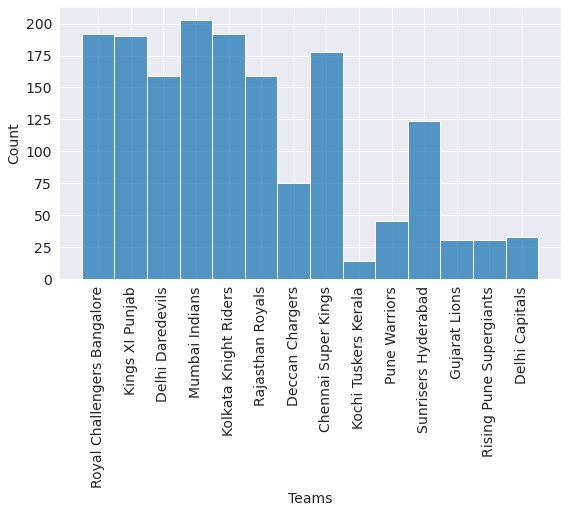

In [35]:
#matches played by each team
played=list(df['team1'])+list(df['team2'])
sns.histplot(played)
plt.xticks(rotation=90)
plt.xlabel('Teams');

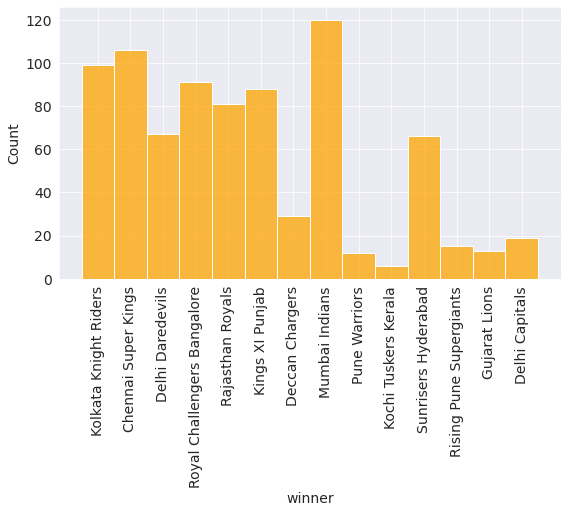

In [36]:
#matches won by each team
sns.histplot(df['winner'], color='orange')
plt.xticks(rotation=90);

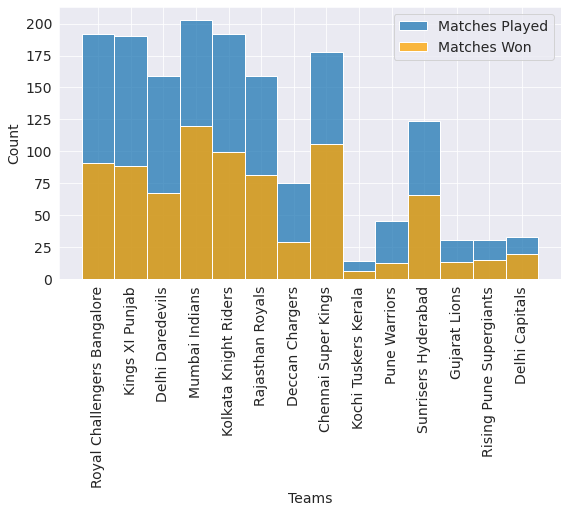

In [37]:
#comparing the matches played and matches won by each team
sns.histplot(played)
sns.histplot(df['winner'], color='orange')
plt.xticks(rotation=90)
plt.legend(['Matches Played','Matches Won'])
plt.xlabel('Teams');

<p style = "background-color: #D3D3D3; color :black;"> <b>Conclusion:</b>`Mumbai Indians` has played and won the most matches.</p>

## Player of the Match

In [38]:
#counting the top 10 players who have won player of the match award using value_counts()
player_of_match=df.player_of_match.value_counts().head(10)
player_of_match

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

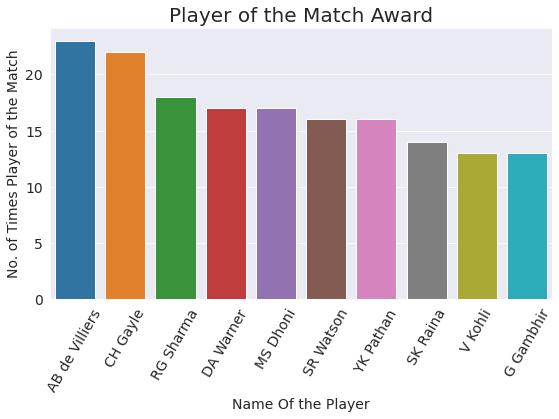

In [39]:
sns.barplot(x=player_of_match.index, y=player_of_match)
plt.xticks(rotation=60)
plt.ylabel('No. of Times Player of the Match')
plt.xlabel('Name Of the Player')
plt.title('Player of the Match Award', fontsize=20);

<p style = "background-color: #D3D3D3; color :black;"> <b>Conclusion:</b>`AB de Villers` has won most Player of the Match awards (23 times) followed by `Chris Gayle` (22 times) and `Rohit Sharma`(18 times).</p>

## Neutral Venues
Most matches are played in the homeground of one of the playing teams, let's checked the neutral venues.

In [40]:
df[df.neutral_venue==1]['venue'].unique()
#gives the list of nuetral venues where no team has homeground advantages

array(['Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium'],
      dtype=object)

## Matches Played per City


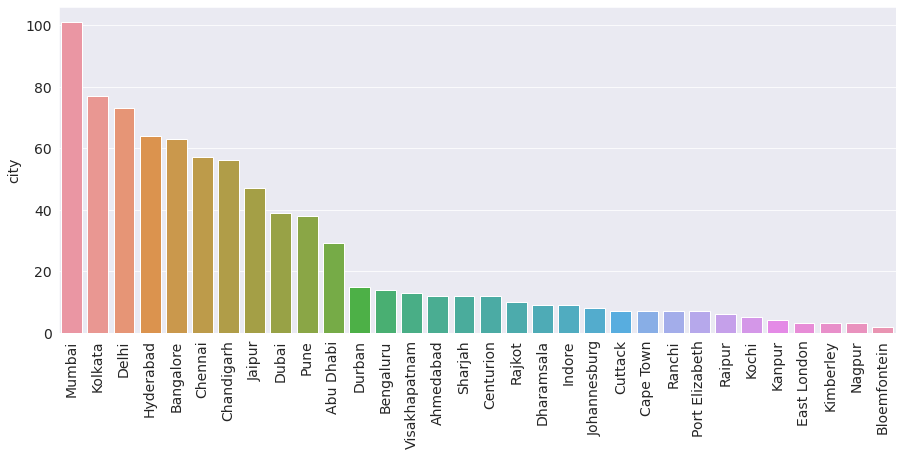

In [41]:
#changing the figsize for this plot
plt.figure(figsize=(15,6))

#using value_counts() for counting each city
city = df.city.value_counts()

#plotting the barplot
sns.barplot(x=city.index, y=city)
plt.xticks(rotation=90);

<p style = "background-color: #D3D3D3; color :black;"> <b>Conclusion:</b> Maximum matches have been played in `Mumbai` while `Kolkata` being the second city to hist IPL matches.</p>

## Team's Winning Proportion Each Year
It is the % of matches won by the team in the particular year. It shows dominance of the team.

Year : 2008 < ================================================== >


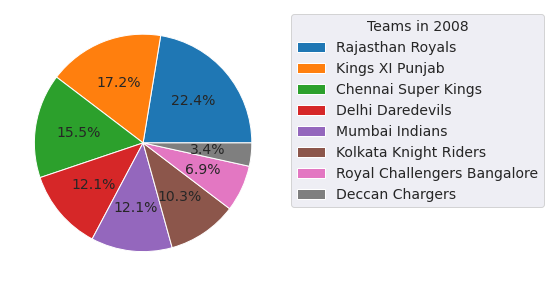

Year : 2009 < ================================================== >


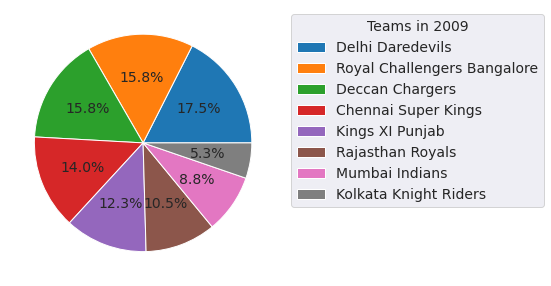

Year : 2010 < ================================================== >


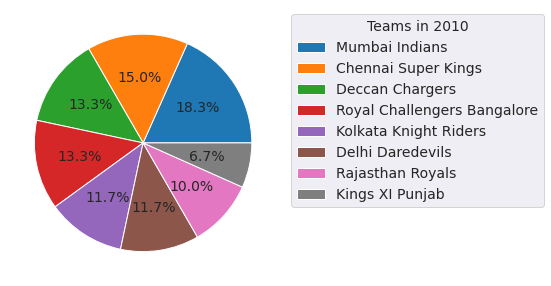

Year : 2011 < ================================================== >


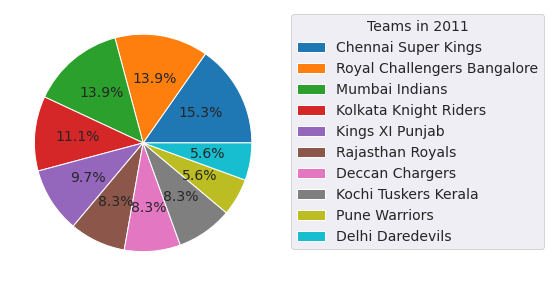

Year : 2012 < ================================================== >


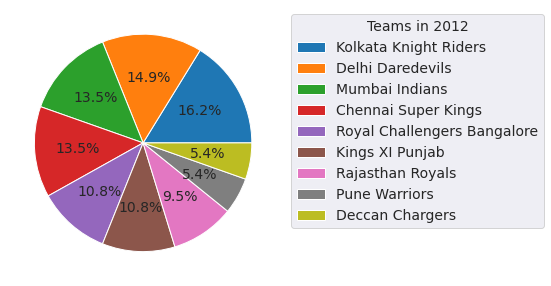

Year : 2013 < ================================================== >


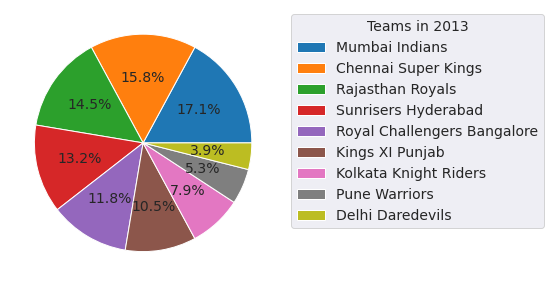

Year : 2014 < ================================================== >


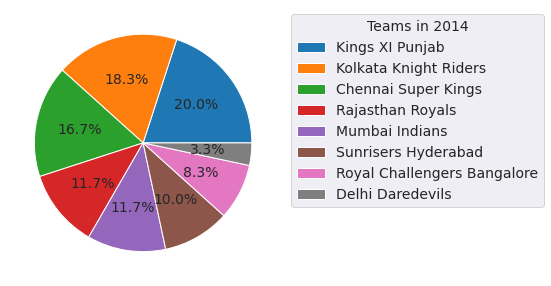

Year : 2015 < ================================================== >


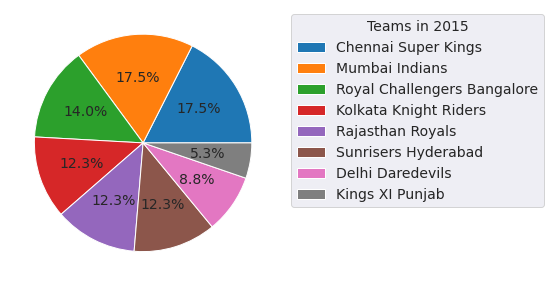

Year : 2016 < ================================================== >


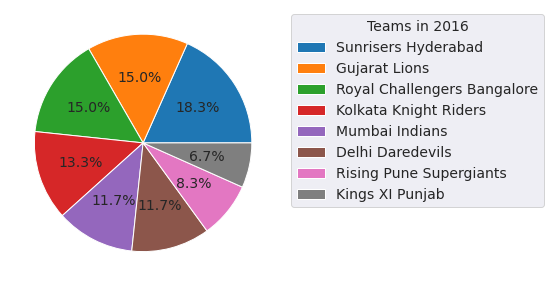

Year : 2017 < ================================================== >


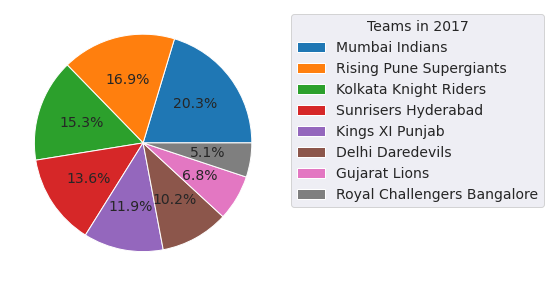

Year : 2018 < ================================================== >


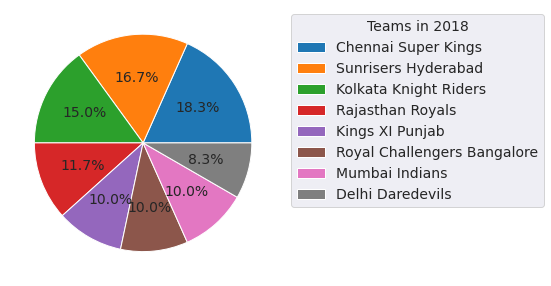

Year : 2019 < ================================================== >


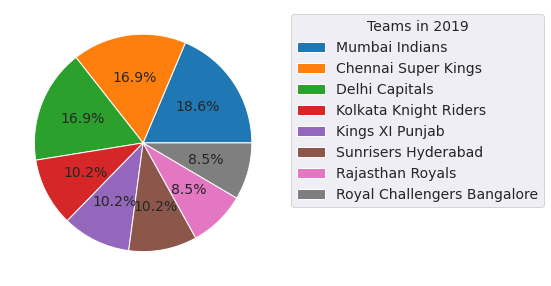

Year : 2020 < ================================================== >


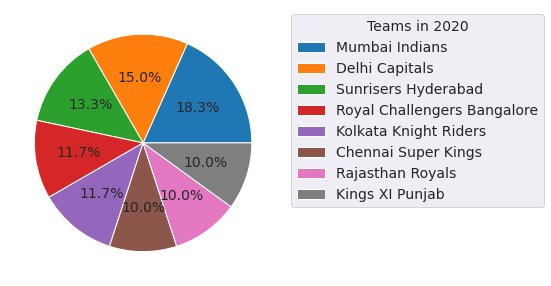

In [42]:
#using for loop for selecting each year from the list of the years
for i in df.year.unique():
    print("Year :", i,'<', '='*50,'>')
    xdf=df[df.year==i] #conditioning over the year
    plt.pie(xdf.winner.value_counts(),autopct="%1.1f%%" ) #plotting pie chart of the winner's value counts
    plt.legend(xdf.winner.value_counts().index,bbox_to_anchor=(2,1),loc='upper right', title='Teams in {}'.format(i))
    plt.show();

With the help of these pie chart we can easily see which teams have won most and least matches in each year.

## Run Scored per Over
Team's Winning Proportion Each Year

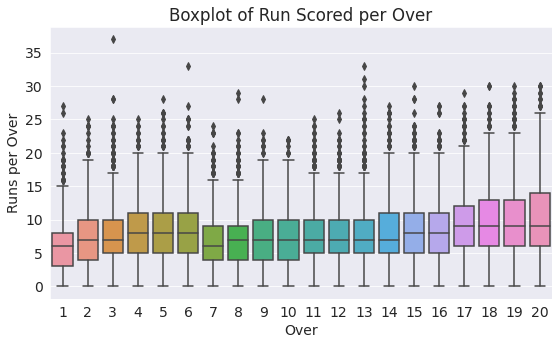

In [43]:
#grouping with conditions
xd=df1.groupby(['id', 'over','inning'], as_index=False)['total_runs'].sum()

#changing the range of overs from 0-19 to 1-20
xd['over']=xd['over']+1

#boxplot for distribution
sns.boxplot(y=xd['total_runs'], x=xd['over'])
plt.title('Boxplot of Run Scored per Over')
plt.ylabel('Runs per Over')
plt.xlabel('Over');

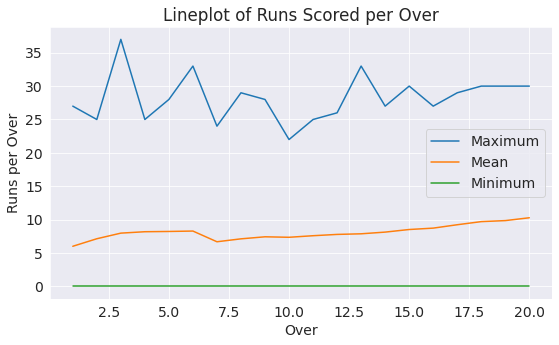

In [44]:
#grouping for finding maximum, minimum and mean
minimum=xd.groupby('over', as_index=False)['total_runs'].min()
maximum=xd.groupby('over', as_index=False)['total_runs'].max()
mean=xd.groupby('over', as_index=False)['total_runs'].mean()

#plotting lineplot with maximum, minmum and mean
sns.lineplot(data=maximum, x='over', y='total_runs')
sns.lineplot(data=mean, x='over', y='total_runs')
sns.lineplot(data=minimum, x='over', y='total_runs')
plt.legend(['Maximum', 'Mean', 'Minimum'])
plt.title('Lineplot of Runs Scored per Over')
plt.xlabel('Over')
plt.ylabel('Runs per Over');

<p style = "background-color: #D3D3D3; color :black;"> <b>Conclusion:</b> Here we can observe that the runs scored per over increases in first five overs (which are power play overs where the batter gets the advantage of less fielders being inside the circle), then decreses from 6th over onwards and increases steadily till the death over.</p>

## Teams with Most Wins At A Venue

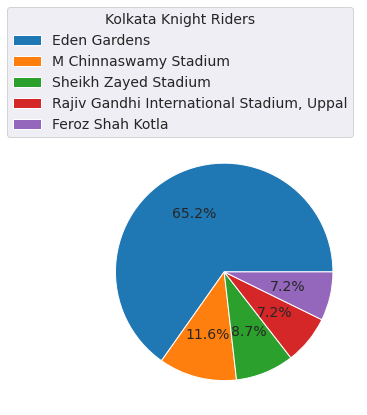

****************************************************************************************************


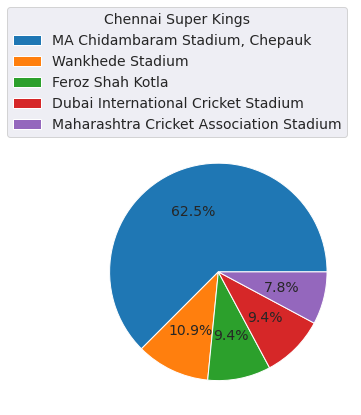

****************************************************************************************************


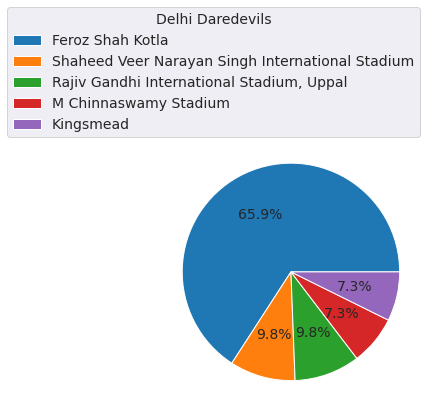

****************************************************************************************************


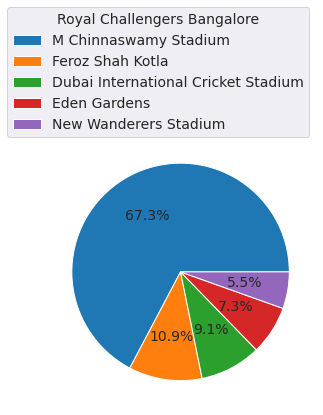

****************************************************************************************************


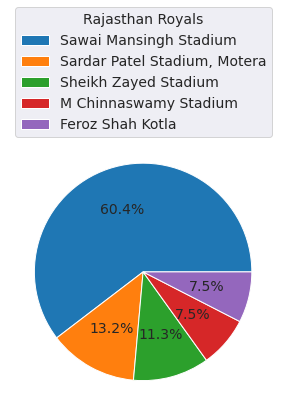

****************************************************************************************************


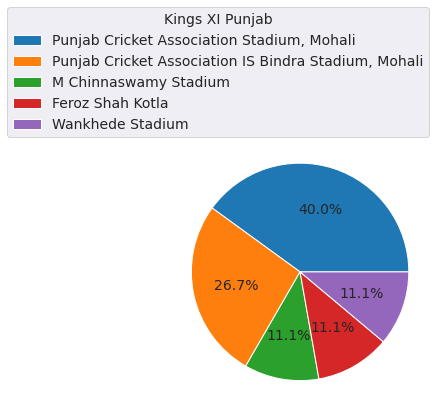

****************************************************************************************************


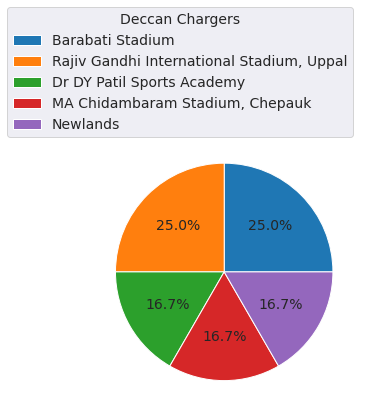

****************************************************************************************************


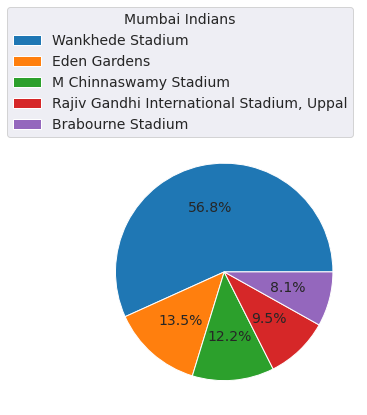

****************************************************************************************************


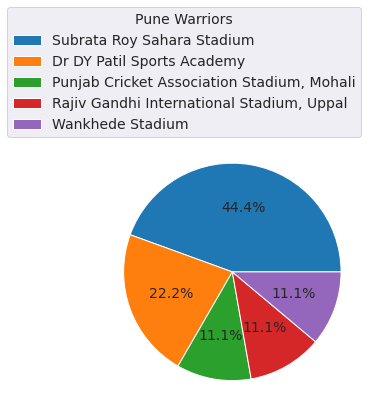

****************************************************************************************************


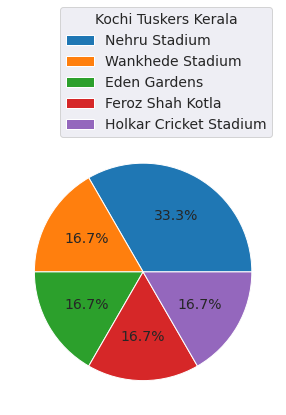

****************************************************************************************************


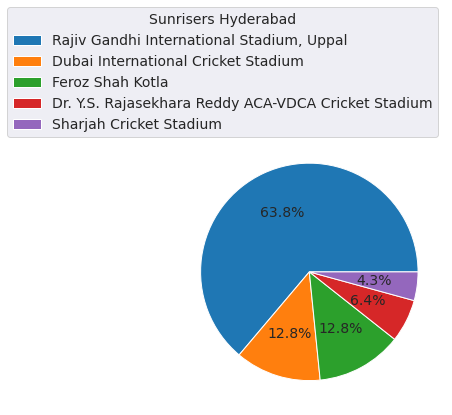

****************************************************************************************************


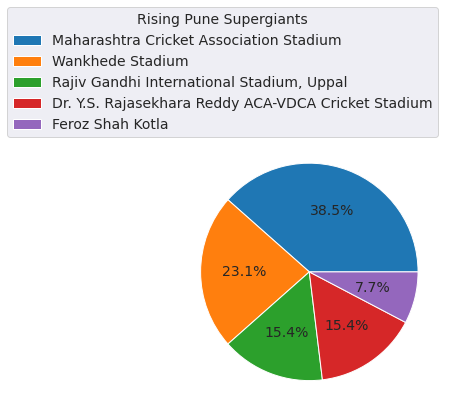

****************************************************************************************************


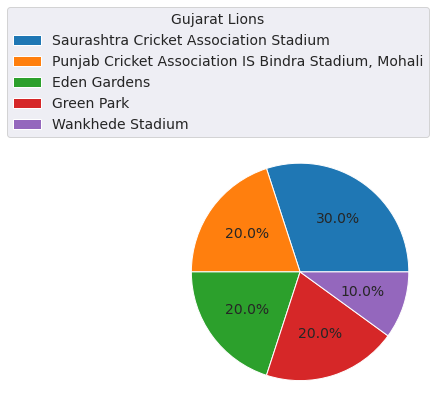

****************************************************************************************************


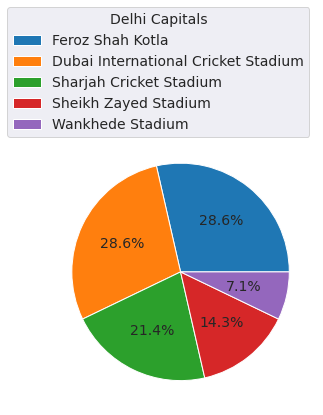

****************************************************************************************************


In [45]:
#using for loop for selecting each team from the list of unique winner teams
for i in df.winner.unique():
    xdf=df[df.winner==i] #conditioning over winning
    plt.pie(xdf.venue.value_counts().head(5),autopct="%1.1f%%" ) #using piechart for plotting with value counts over
    plt.legend(xdf.venue.value_counts().head(5).index, bbox_to_anchor=(1,1.5),loc='upper right', title=i)
    plt.show()
    print("*"*100);

<p style = "background-color: #D3D3D3; color :black;"> <b>Conclusion:</b> We can observe that they have won most matches on their homegrouds. Though, it doesn't directly imply that their chances of winning the match is higher on homeground, because half of the matches from the season take place at the homeground and other half at the homeground of each opponent teams. </p>

# Asking and Answering Questions
Asking questions to derive insights from the data is an essential process. In here I have asked relevent questions to my data and tried to find there answer using python which will eventually lead me to some meaningful insights.

### Q1: Does playing on the homeground has any  advantages?

Here homeground refers to the ground in the city which the team represents. We will create a dictionary with teams and thier homegrounds using the above pie charts.

In [46]:
#gives homeground of each team
#i.e. the ground where half of their matches for the season take place
homeground={}
for i in df.winner.unique():
    xdf=df[df.winner==i]
    homeground[i]=xdf.venue.value_counts().head(1).index[0]

#gives number of matches played by each team on their homeground
teams_played={}
for i in homeground:
    xd=df[df.venue==homeground[i]]
    teams_played[i]=len(xd)

#gives the number of matches won by each team on their homeground
teams_won={}
for i in homeground:
    xd=df.loc[(df['venue']==homeground[i]) & (df['winner']==i)]
    teams_won[i]=len(xd)

#win percentage of each team on their homeground
win_percentage={}
for i in homeground:
    win_percentage[i]=(teams_won[i]/teams_played[i])*100
win_percentage

{'Kolkata Knight Riders': 58.44155844155844,
 'Chennai Super Kings': 70.17543859649122,
 'Delhi Daredevils': 36.986301369863014,
 'Royal Challengers Bangalore': 48.05194805194805,
 'Rajasthan Royals': 68.08510638297872,
 'Kings XI Punjab': 51.42857142857142,
 'Deccan Chargers': 42.857142857142854,
 'Mumbai Indians': 57.534246575342465,
 'Pune Warriors': 23.52941176470588,
 'Kochi Tuskers Kerala': 40.0,
 'Sunrisers Hyderabad': 46.875,
 'Rising Pune Supergiants': 23.809523809523807,
 'Gujarat Lions': 30.0,
 'Delhi Capitals': 5.47945205479452}

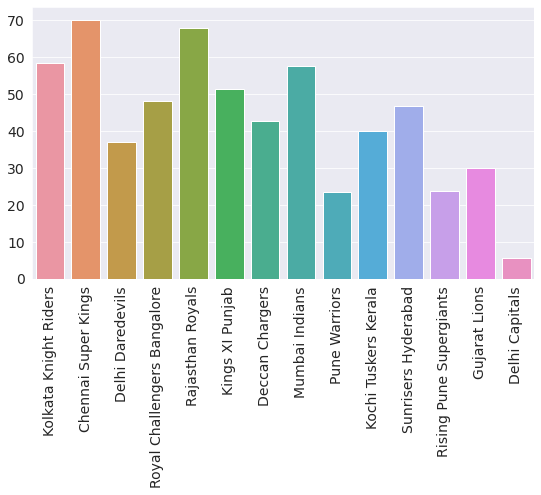

In [47]:
#assigning values to the variables
y=list(win_percentage.values())
x=list(win_percentage.keys())

#plotting barplot of win % with above values
sns.barplot(x=x,y=y)
plt.xticks(rotation=90);

<p style = "background-color: #D3D3D3; color :black;"> <b>Answer:</b> `Chennai Super Kings` has the highest winning rate at home matches followed by `Rajsthan Royals`. These are the only teams with above `60%` wins on the homeground. Also most of the teams have less than `50%` winning rate on their homeground. Therefore we can conclude that homeground doesn't play much significant role in winning the matches.</p>

### Q2 : Who has scored most runs in all seasons and each individual season?

In [48]:
#grouping (here summing) batsman runs based on the batsman for all seasons
xd=df2.groupby(['batsman'], as_index=False)['batsman_runs'].sum().sort_values('batsman_runs', ascending=False).head(10)
xd
#this are the top 10 players who have scored most runs in all IPL Season

,batsman,batsman_runs
505,V Kohli,5851
438,SK Raina,5368
116,DA Warner,5235
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4782
96,CH Gayle,4761
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


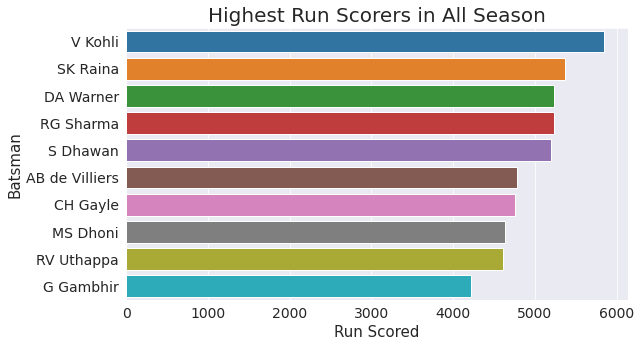

In [49]:
#barplot using above dataframe
sns.barplot(x=xd['batsman_runs'], y=xd['batsman'])
plt.title('Highest Run Scorers in All Season', fontsize=20)
plt.xlabel('Run Scored', fontsize=15 )
plt.ylabel('Batsman', fontsize=15);

In [50]:
#finding the top scorer for each season using looping
#creating a dictionary
top_scorers={}
for i in list(df.year.unique()): #using for loop for getting each year (season)
    xd=df2[df2.year==i] #conditioning based on the season
    sd=xd.groupby(['batsman'], as_index=False)['batsman_runs'].sum().sort_values('batsman_runs', ascending=False).head(1)
    #finding the top scorer each season and adding the to the dictionary created before
    top_scorers[(sd['batsman'].iloc[0]+str(' ')+str(i))]=sd['batsman_runs'].iloc[0]

In [51]:
top_scorers

{'SE Marsh 2008': 616,
 'ML Hayden 2009': 572,
 'SR Tendulkar 2010': 618,
 'CH Gayle 2011': 608,
 'CH Gayle 2012': 733,
 'MEK Hussey 2013': 733,
 'RV Uthappa 2014': 660,
 'DA Warner 2015': 562,
 'V Kohli 2016': 973,
 'DA Warner 2017': 641,
 'KS Williamson 2018': 735,
 'DA Warner 2019': 692,
 'KL Rahul 2020': 670}

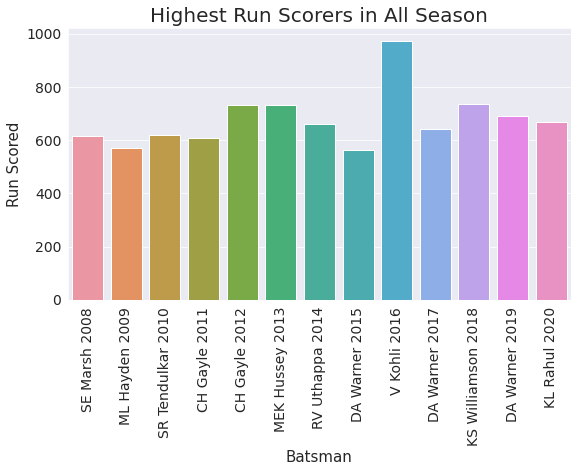

In [52]:
#assinging the values to the variables
x=list(top_scorers.keys())
y=list(top_scorers.values())

#plotting barplot of the top scorers for the respective season
sns.barplot(x=x, y=y )
plt.xticks(rotation=90)
plt.title('Highest Run Scorers in All Season', fontsize=20)
plt.ylabel('Run Scored', fontsize=15 )
plt.xlabel('Batsman', fontsize=15);

<p style = "background-color: #D3D3D3; color :black;"> <b>Answer:</b>`Virat Kohli` has scored most runs (5851) in all seasons combined and he has also scored most runs (973) in a single season (2016).</p>

 ### Q.3 Who has taken most wickets in all seasons and each individual season?

In [53]:
#conditioning with wickets fallen
#keeping in mind that only caught, bowled, lbw and caught and bowled wickets are given to the bowler
wd=df2[(df2.is_wicket==1)&((df2.dismissal_kind=='caught')|(df2.dismissal_kind=='bowled')|(df2.dismissal_kind=='lbw')|(df2.dismissal_kind=='caught and bowled'))]

#counting the values
wdc=wd['bowler'].value_counts().head(10)
wdc

SL Malinga         170
DJ Bravo           153
PP Chawla          140
B Kumar            135
A Mishra           133
Harbhajan Singh    131
R Ashwin           130
UT Yadav           119
SP Narine          117
JJ Bumrah          109
Name: bowler, dtype: int64

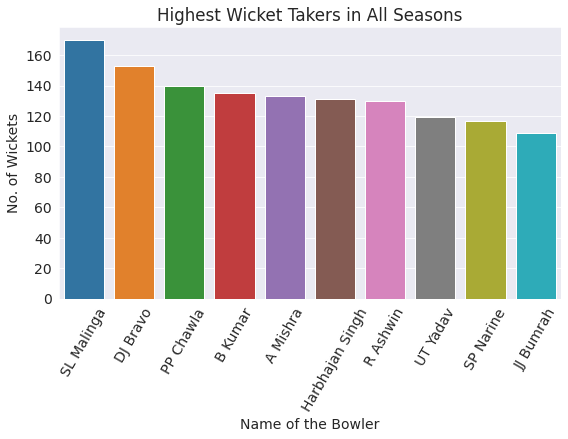

In [54]:
#plotting the barplot using above values
sns.barplot(x=wdc.index, y=wdc)
plt.title('Highest Wicket Takers in All Seasons')
plt.xlabel('Name of the Bowler')
plt.ylabel('No. of Wickets')
plt.xticks(rotation=60);

In [55]:
#creating dictionary for highest wicket takers for each season
top_bowler={}
#using for loop over previously conditioned wd
for i in list(wd.year.unique()):
    cwd=wd[wd.year==i] #using wd for each season
    cwd=cwd.groupby('bowler', as_index=False)['is_wicket'].sum().sort_values('is_wicket', ascending=False).head(1)
    #counting wickets of ball appending them to the dictionary
    top_bowler[(cwd['bowler'].iloc[0]+str(' ')+str(i))]=cwd['is_wicket'].iloc[0]
top_bowler

{'Sohail Tanvir 2008': 22,
 'RP Singh 2009': 23,
 'PP Ojha 2010': 17,
 'SL Malinga 2011': 28,
 'M Morkel 2012': 25,
 'DJ Bravo 2013': 32,
 'MM Sharma 2014': 23,
 'DJ Bravo 2015': 26,
 'B Kumar 2016': 23,
 'B Kumar 2017': 26,
 'AJ Tye 2018': 24,
 'K Rabada 2019': 25,
 'K Rabada 2020': 30}

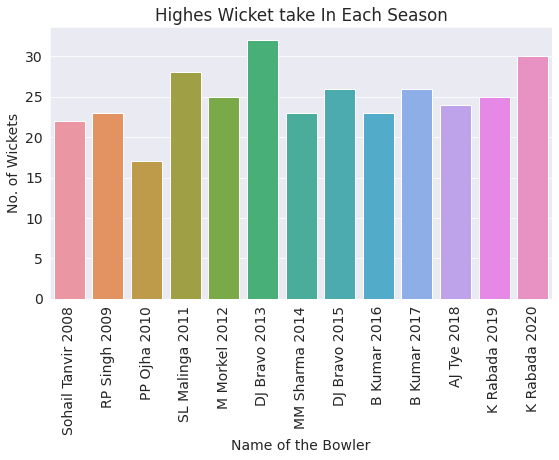

In [56]:
#assinging the variables
x=list(top_bowler.keys())
y=list(top_bowler.values())

#creating the barplot
sns.barplot(x=x, y=y)
plt.title('Highes Wicket take In Each Season')
plt.xlabel('Name of the Bowler')
plt.ylabel('No. of Wickets')
plt.xticks(rotation=90);

<p style = "background-color: #D3D3D3; color :black;"> <b>Answer:</b>`SL Malinga` has taken most wickets (170) combined in all seasons and `DJ Bravo` has taken most wickets (32) in a single season (2013).</p>

### Q.4 Who are the top 10 fielders?
We will decide this based on the number of catches they have taken.

In [57]:
#using filtering over df1
fd=df1[(df1.dismissal_kind=='caught')]['fielder'].value_counts().head(10)
fd

KD Karthik        118
MS Dhoni          113
AB de Villiers    103
SK Raina           99
RG Sharma          88
RV Uthappa         87
KA Pollard         84
V Kohli            76
S Dhawan           73
MK Pandey          70
Name: fielder, dtype: int64

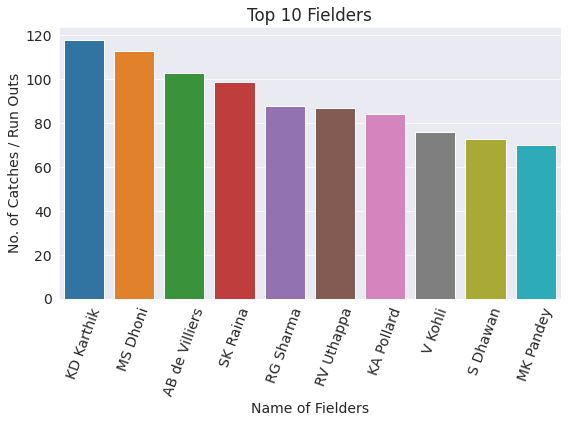

In [58]:
sns.barplot(x=fd.index, y=fd)
plt.title('Top 10 Fielders')
plt.xlabel('Name of Fielders')
plt.ylabel('No. of Catches / Run Outs')
plt.xticks(rotation=70);

<p style = "background-color: #D3D3D3; color :black;"> <b>Answer:</b> Here the top 2 are wicket-keepers therefore they tend to recieve the ball miss-hitted from the batsman more often. If we consider the outer field then `AB de Villiers` is the top fielder (although he has done keeping quite a few times) followed by`SK Raina` and `RG Sharma`.</p>

### Q.5: Does winning toss increases the chances of winning the match?

Chances that toss winner will win the match : 51.47783251231527 %


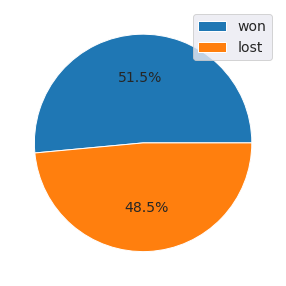

In [59]:
#conditioning and assiging the number of rows
a=len(df[df.winner==df.toss_winner])
b=len(df)
print('Chances that toss winner will win the match :',(a/b)*100, '%')
plt.pie([a,b-a],autopct="%1.1f%%")
plt.legend(['won','lost']);

let's see if decision after winning the toss effects or not

Chances that toss winner will win the match : 55.375253549695735 %


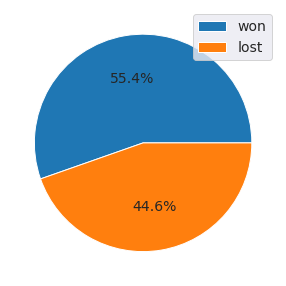

In [60]:
#fielding first
xdf=df[df.toss_decision=='field']
#conditioning and assiging the number of rows
a=len(xdf[xdf.winner==xdf.toss_winner])
b=len(xdf)
print('Chances that toss winner will win the match :',(a/b)*100, '%')
plt.pie([a,b-a],autopct="%1.1f%%")
plt.legend(['won','lost']);

Chances that toss winner will win the match : 45.45454545454545 %


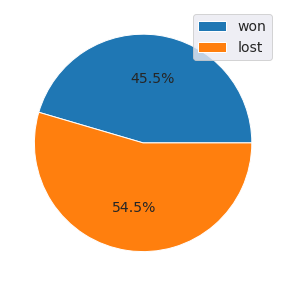

In [61]:
#batting first
xdf=df[df.toss_decision=='bat']
#conditioning and assiging the number of rows
a=len(xdf[xdf.winner==xdf.toss_winner])
b=len(xdf)
print('Chances that toss winner will win the match :',(a/b)*100, '%')
plt.pie([a,b-a],autopct="%1.1f%%")
plt.legend(['won','lost']);

<p style = "background-color: #D3D3D3; color :black;"> <b>Answer:</b><br>
1. It is not necessary that the toss winner will win the match.<br>
2. Toss winners who choose to field first have more chances to win the match than the ones who choose to bat first.</p>

### Q.6 Compare the team clashes.
Here we will compare famous team clashes. We will compare them on the basis on number of matches they have won against each other, highest and lowest scores against each other, 4's and 6's conceded, wickets taken, highest run scorers and highest wicket takers of the clash.

In [62]:
#defining the function that takes input as the names of the teams
#and returns all the stats from their clashes
#it also plot the stats in the form of bar plot for us to see the comparative relationship clearly
def team_comparison(team1, team2):
    #creating object for storing plots
    fig, axes = plt.subplots(2, 3, figsize=(16, 8))
    
    #finding the number of clahses and wins by eacm team
    xd=df[((df.team1==team1)&(df.team2==team2))|((df.team1==team2)&(df.team2==team1))]
    win=xd.winner.value_counts()
    print('Total Clashes :', len(xd))
    print('*'*50)
    print('Wins by Each Team :')
    print(win)
    print('*'*50)
    print('Winning Chances (in %)')
    print((win/len(xd))*100)
    print('*'*50)
    
    #finding highest and lowest scores of the clash
    cd=df2[((df2.team1==team1)&(df2.team2==team2))|((df2.team1==team2)&(df2.team2==team1))]
    cd=cd.groupby(['id','inning'], as_index=False)['total_runs'].sum()
    maxi=cd['total_runs'].max()
    maxi_run=cd[cd.total_runs==maxi]
    high_scorer=df2[(df2.id==maxi_run['id'].iloc[0]) &(df2.inning==maxi_run['inning'].iloc[0])]['batting_team'].iloc[0]
    mini=cd['total_runs'].min()
    mini_run=cd[cd.total_runs==mini]
    low_scorer=df2[(df2.id==mini_run['id'].iloc[0]) &(df2.inning==mini_run['inning'].iloc[0])]['batting_team'].iloc[0]
    print(high_scorer,'has the highest score of', maxi,'runs in the clash.')
    print(low_scorer, 'has the lowest score of', mini,'runs in the clash.')
    print('*'*50)
    
    #finding total runs, top scorers, number of 4's and 6's by team1
    #and total wickets and highest wicket taken by team2
    xdf=df2[(df2.batting_team==team1) & (df2.bowling_team==team2)]
    bat_run_4=len(xdf[xdf.batsman_runs==4])
    bat_run_6=len(xdf[xdf.batsman_runs==6])
    total_runs=xdf['batsman_runs'].sum()
    wicket=len(xdf[xdf.is_wicket==1])
    bf=xdf.groupby(['batsman'], as_index=False)['batsman_runs'].sum().sort_values('batsman_runs', ascending=False).head(1)
    run_bf=bf['batsman_runs'].iloc[0]
    bf=bf['batsman'].iloc[0]
    bwl=xdf.groupby('bowler', as_index=False)['is_wicket'].sum().sort_values('is_wicket', ascending=False).head(1)
    bwl_wick=bwl['is_wicket'].iloc[0]
    bwl=bwl['bowler'].iloc[0]
    print(team1, 'has scored', total_runs, 'runs with',bat_run_4,'4s and',bat_run_6 ,'6s against', team2)
    print('While the top scorer is',bf, 'with',run_bf,'runs.')
    print(team2, 'has taken', wicket,'wickets against',team1)
    print('While the top wicket taker is',bwl,'with',bwl_wick, 'wickets.')
    print('*'*50)
    
    #plots while team1 batting and team2 bowling
    axes[0,0].set_title('Scores of teams')
    axes[0,0].bar(height=total_runs,x=team1)
    axes[0,1].set_title('Wickets of teams')
    axes[0,1].bar(height=wicket,x=team2)
    axes[0,2].set_title('Highest Run Scorer')
    axes[0,2].bar(height=run_bf,x=bf)
    axes[1,0].set_title('Highes Wicket Taker')
    axes[1,0].bar(height=bwl_wick,x=bwl)
    axes[1,1].set_title('Number of 4s')
    axes[1,1].bar(height=bat_run_4,x=team1)
    axes[1,2].set_title('Number of 6s')
    axes[1,2].bar(height=bat_run_6,x=team1)
    
    #finding total runs, top scorers, number of 4's and 6's by team2
    #and total wickets and highest wicket taken by team1
    xdf=df2[(df2.batting_team==team2) & (df2.bowling_team==team1)]
    bat_run_4=len(xdf[xdf.batsman_runs==4])
    bat_run_6=len(xdf[xdf.batsman_runs==6])
    total_runs=xdf['batsman_runs'].sum()
    wicket=len(xdf[xdf.is_wicket==1])
    bf=xdf.groupby(['batsman'], as_index=False)['batsman_runs'].sum().sort_values('batsman_runs', ascending=False).head(1)
    run_bf=bf['batsman_runs'].iloc[0]
    bf=bf['batsman'].iloc[0]
    bwl=xdf.groupby('bowler', as_index=False)['is_wicket'].sum().sort_values('is_wicket', ascending=False).head(1)
    bwl_wick=bwl['is_wicket'].iloc[0]
    bwl=bwl['bowler'].iloc[0]
    print(team2, 'has scored', total_runs, 'runs with', bat_run_4,'4s and',bat_run_6 ,'6s against', team1)
    print('While the top scorer is',bf, 'with',run_bf,'runs.')
    print(team1, 'has taken', wicket,'wickets against',team2)
    print('While the top wicket taker is',bwl,'with',bwl_wick, 'wickets.')
    
    #plots while team1 batting and team2 bowling
    axes[0,0].set_title('Scores of teams')
    axes[0,0].bar(height=total_runs,x=team2)
    axes[0,1].set_title('Wickets of teams')
    axes[0,1].bar(height=wicket,x=team1)
    axes[0,2].set_title('Highest Run Scorer')
    axes[0,2].bar(height=run_bf,x=bf)
    axes[1,0].set_title('Highes Wicket Taker')
    axes[1,0].bar(height=bwl_wick,x=bwl)
    axes[1,1].set_title('Number of 4s')
    axes[1,1].bar(height=bat_run_4,x=team2)
    axes[1,2].set_title('Number of 6s')
    axes[1,2].bar(height=bat_run_6,x=team2)
    
    plt.tight_layout(pad=2);

Total Clashes : 30
**************************************************
Wins by Each Team :
Mumbai Indians         18
Chennai Super Kings    12
Name: winner, dtype: int64
**************************************************
Winning Chances (in %)
Mumbai Indians         60.0
Chennai Super Kings    40.0
Name: winner, dtype: float64
**************************************************
Chennai Super Kings has the highest score of 208 runs in the clash.
Chennai Super Kings has the lowest score of 79 runs in the clash.
**************************************************
Mumbai Indians has scored 4534 runs with 403 4s and 196 6s against Chennai Super Kings
While the top scorer is RG Sharma with 626 runs.
Chennai Super Kings has taken 176 wickets against Mumbai Indians
While the top wicket taker is DJ Bravo with 27 wickets.
**************************************************
Chennai Super Kings has scored 4330 runs with 395 4s and 161 6s against Mumbai Indians
While the top scorer is SK Raina with 704

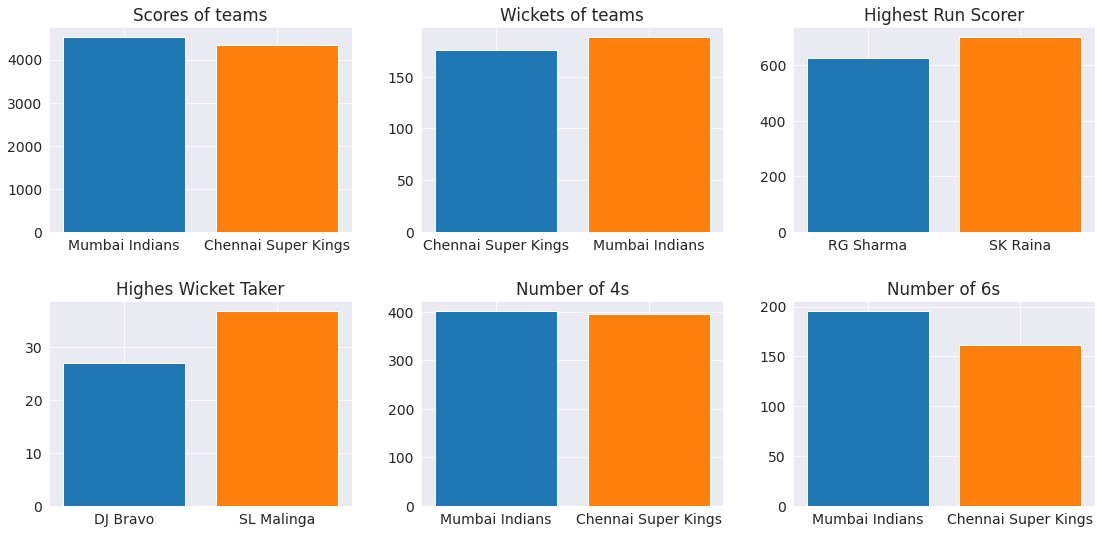

In [63]:
#Mumbai Indians vs Chennai Super Kings is the most anticipated match from the entire tournaments.
team_comparison('Mumbai Indians','Chennai Super Kings')

Total Clashes : 26
**************************************************
Wins by Each Team :
Kolkata Knight Riders          14
Royal Challengers Bangalore    12
Name: winner, dtype: int64
**************************************************
Winning Chances (in %)
Kolkata Knight Riders          53.846154
Royal Challengers Bangalore    46.153846
Name: winner, dtype: float64
**************************************************
Kolkata Knight Riders has the highest score of 222 runs in the clash.
Royal Challengers Bangalore has the lowest score of 49 runs in the clash.
**************************************************
Royal Challengers Bangalore has scored 3688 runs with 330 4s and 153 6s against Kolkata Knight Riders
While the top scorer is V Kohli with 725 runs.
Kolkata Knight Riders has taken 132 wickets against Royal Challengers Bangalore
While the top wicket taker is SP Narine with 16 wickets.
**************************************************
Kolkata Knight Riders has scored 3866 runs with

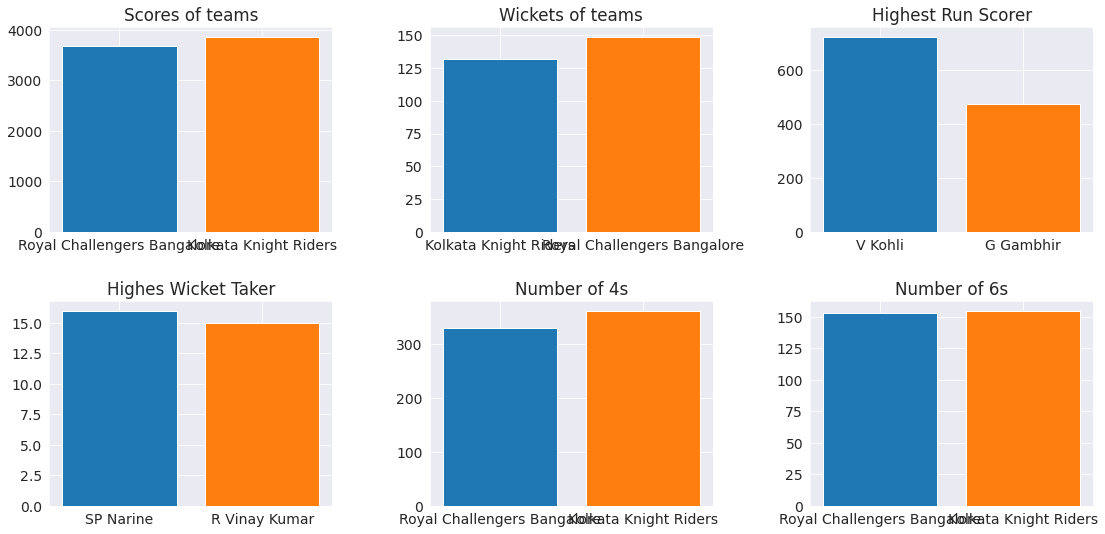

In [64]:
#possibly the biggest rivals
team_comparison('Royal Challengers Bangalore','Kolkata Knight Riders')

Total Clashes : 21
**************************************************
Wins by Each Team :
Rajasthan Royals    12
Kings XI Punjab      9
Name: winner, dtype: int64
**************************************************
Winning Chances (in %)
Rajasthan Royals    57.142857
Kings XI Punjab     42.857143
Name: winner, dtype: float64
**************************************************
Rajasthan Royals has the highest score of 226 runs in the clash.
Rajasthan Royals has the lowest score of 112 runs in the clash.
**************************************************
Rajasthan Royals has scored 3394 runs with 334 4s and 123 6s against Kings XI Punjab
While the top scorer is SV Samson with 406 runs.
Kings XI Punjab has taken 119 wickets against Rajasthan Royals
While the top wicket taker is PP Chawla with 14 wickets.
**************************************************
Kings XI Punjab has scored 3287 runs with 292 4s and 135 6s against Rajasthan Royals
While the top scorer is SE Marsh with 409 runs.
Rajas

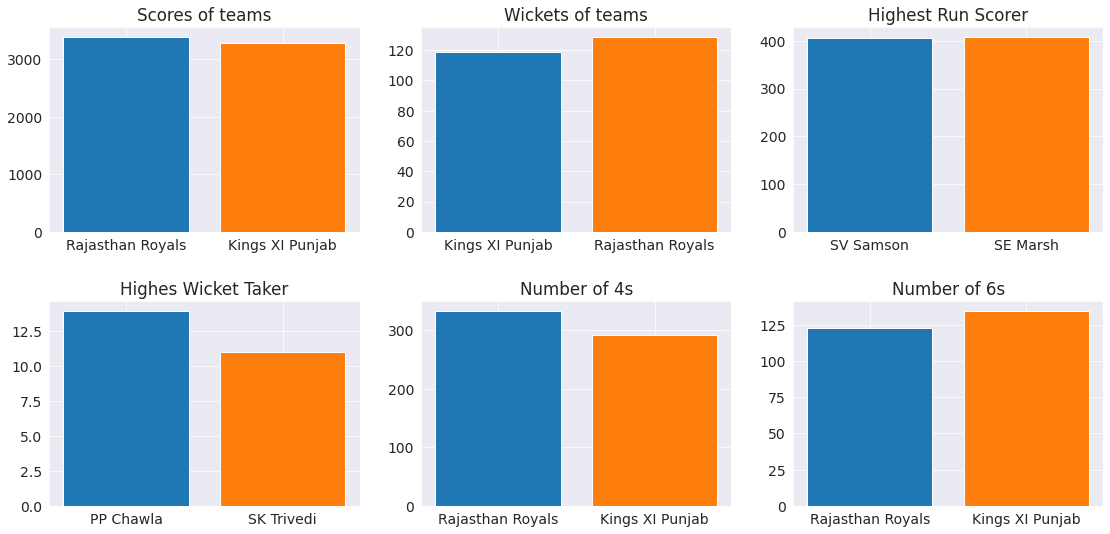

In [65]:
#although not many people know this, but this is the best clash
team_comparison('Rajasthan Royals','Kings XI Punjab')

Total Clashes : 6
**************************************************
Wins by Each Team :
Sunrisers Hyderabad    3
Delhi Capitals         3
Name: winner, dtype: int64
**************************************************
Winning Chances (in %)
Sunrisers Hyderabad    50.0
Delhi Capitals         50.0
Name: winner, dtype: float64
**************************************************
Sunrisers Hyderabad has the highest score of 219 runs in the clash.
Sunrisers Hyderabad has the lowest score of 116 runs in the clash.
**************************************************
Delhi Capitals has scored 868 runs with 75 4s and 30 6s against Sunrisers Hyderabad
While the top scorer is S Dhawan with 148 runs.
Sunrisers Hyderabad has taken 43 wickets against Delhi Capitals
While the top wicket taker is Rashid Khan with 11 wickets.
**************************************************
Sunrisers Hyderabad has scored 912 runs with 82 4s and 29 6s against Delhi Capitals
While the top scorer is DA Warner with 174 runs.

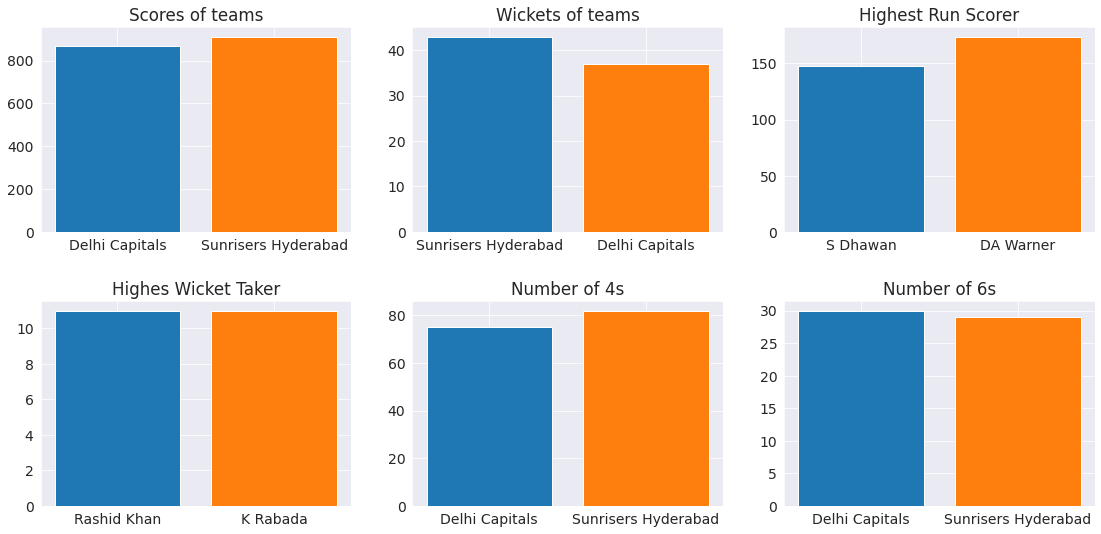

In [66]:
#let's compare some newly introduced teams
team_comparison('Delhi Capitals','Sunrisers Hyderabad')

### Q.7 Find stastical information of any given team.
We will define a function that takes name of the team as input and returns its statistical information such as most MOM winner player, top scorer, highest wicket taker and win percentages against other teams.

In [67]:
def stats_info(team):
    team_df=df[(df.team1==team)|(df.team2==team)]
    mom_df=pd.DataFrame(team_df.describe(include=['O']))
    print(mom_df.player_of_match.iloc[2],'has won most ({}) player of the match awards for {}.'.format(mom_df.player_of_match.iloc[3], team))
    print('*'*100)
    L=['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Delhi Capitals']
    L.remove(team)
    wins_dict={}
    for i in L:
        c2_df=team_df[(team_df.team1==i)|(team_df.team2==i)]
        team_won=len(c2_df[c2_df.winner==team])
        team_played=len(c2_df)
        try:
            win_ratio=team_won/team_played
        except Exception as e:
            win_ratio=0
        wins_dict[i]=(win_ratio*100)
    sns.barplot(x=list(wins_dict.keys()),y=list(wins_dict.values()))
    plt.title('Winning Percentage of {}'.format(team))
    plt.xlabel('Teams')
    plt.ylabel('Winning Percentage')
    plt.xticks(rotation=90)
    plt.show()
    print('*'*100)
    team_df2=df2[(df2.team1==team)|(df2.team2==team)]
    xd=team_df2.groupby(['batsman'], as_index=False)['batsman_runs'].sum().sort_values('batsman_runs', ascending=False).head(10)
    sns.barplot(data=xd, x='batsman',y='batsman_runs')
    plt.title('Top Run Scorers for {}'.format(team))
    plt.xlabel('Batsman')
    plt.ylabel('Runs Scored')
    plt.xticks(rotation=90)
    plt.show()
    print('*'*100)
    wd=team_df2[(team_df2.is_wicket==1)&((team_df2.dismissal_kind=='caught')|(team_df2.dismissal_kind=='bowled')|(team_df2.dismissal_kind=='lbw')|(team_df2.dismissal_kind=='caught and bowled'))]
    #counting the values
    wdc=wd['bowler'].value_counts().head(10)
    sns.barplot(x=wdc.index,y=wdc)
    plt.title('Most Wicket Takers for {}'.format(team))
    plt.xlabel('Bolwer')
    plt.ylabel('No. of Wickets Taken')
    plt.xticks(rotation=90)
    plt.show()

RG Sharma has won most (16) player of the match awards for Mumbai Indians.
****************************************************************************************************


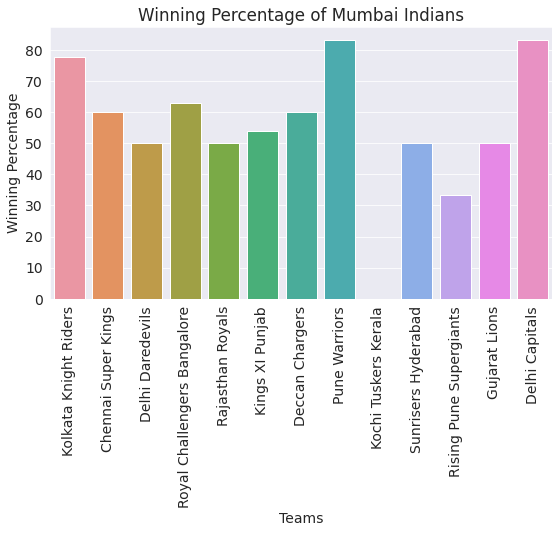

****************************************************************************************************


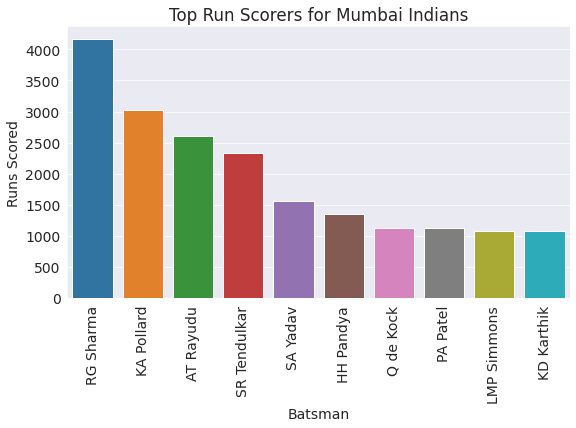

****************************************************************************************************


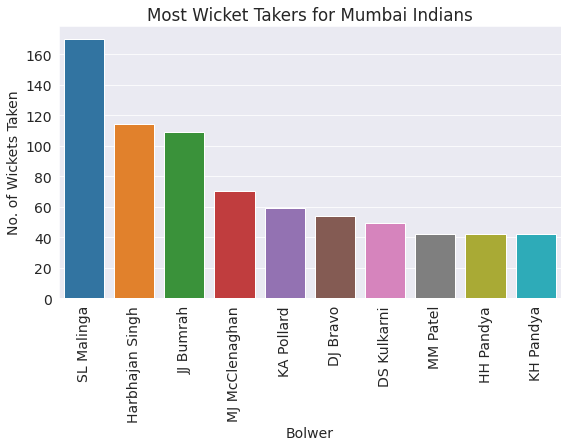

In [68]:
#getting the stastical information of top team
stats_info('Mumbai Indians')

MS Dhoni has won most (15) player of the match awards for Chennai Super Kings.
****************************************************************************************************


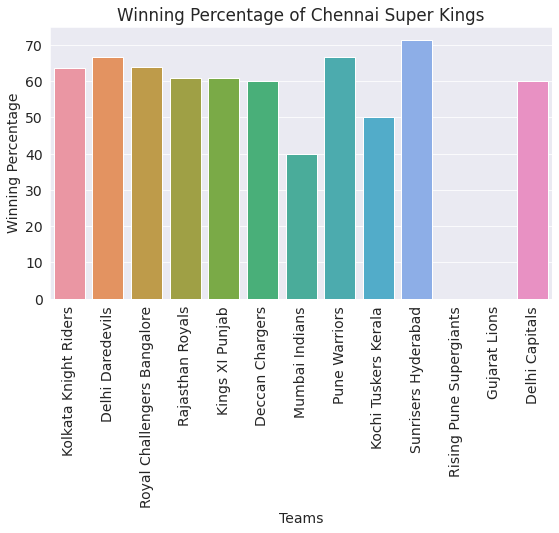

****************************************************************************************************


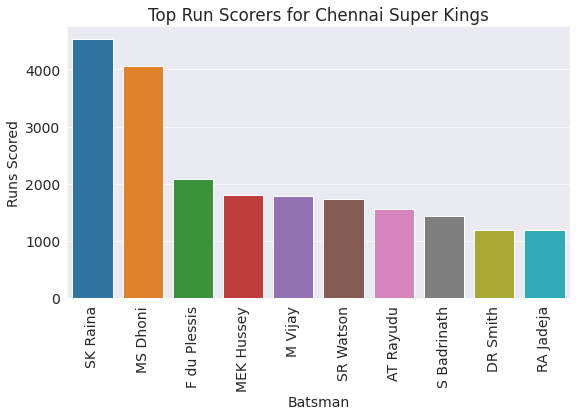

****************************************************************************************************


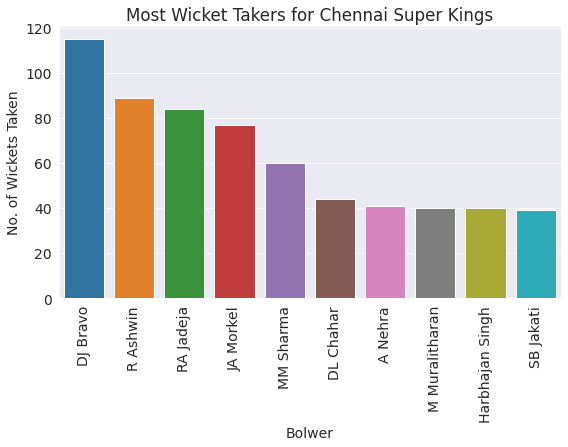

In [69]:
#stastical information of the champion team
stats_info('Chennai Super Kings')

AB de Villiers has won most (21) player of the match awards for Royal Challengers Bangalore.
****************************************************************************************************


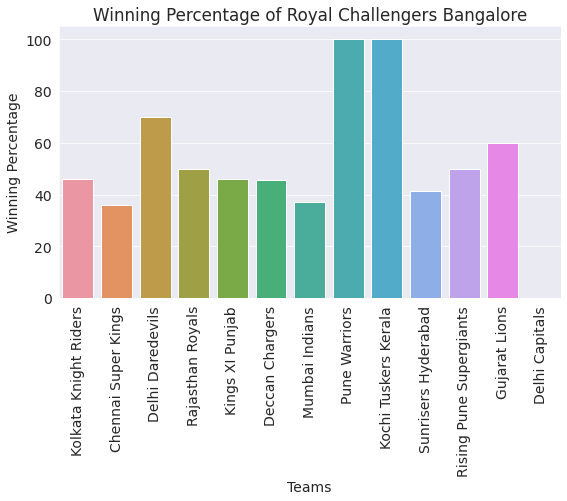

****************************************************************************************************


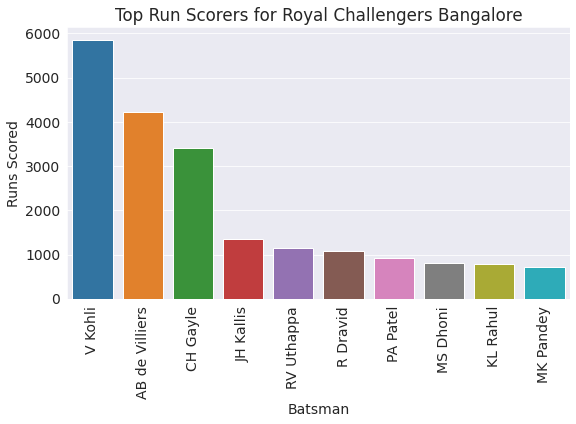

****************************************************************************************************


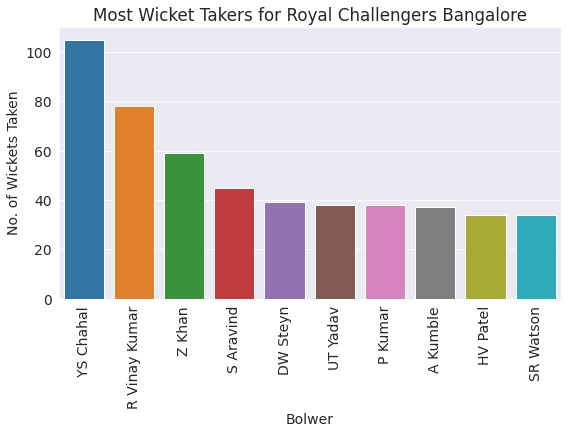

In [70]:
#statistical information of the most popular team
stats_info('Royal Challengers Bangalore')

<div class="alert alert-block alert-info"><h1>📌Inferences and Conclusion :</h1> <br>
<p style='color:black;'>
From the analysis performed above we can conclude following things:<br>
1. Mumbai Indians have won highest number matches followed by Chennai Super Kings.<br>
2. AB de Villiers has won most player of the match awards and MVP of the RCB franchise, he also the top fielder.<br>
3. Maximum matches have been played in non-neutral venue. Mumbai tops the list for most matches played in a city followed by Kolkata.<br>
4. The run rate increases till over play then goes down during midovers while gradually increases in the death overs.<br>
5. Most wins by each team are their homeground but not because the conditions are suitable but because half of the match from the entire season have been played on the homeground of a team and other half on the homegrounds of opposition. Therefore large number of matches being played on homeground lead large wins their.<br>
6. Only Chennai Super Kings and Rajsthan Royals have significant win percentage at homeground. Others are mostly below 50% which supports our previous statement.<br>
7. Virat Kohli is the star batsman of the game because he holds the record for most runs in all seasons combined and most runs in a single season.<br>
8. SL Malinga has taken most wickets in all seasons combined while DJ Bravo has take most wickets in a single season.<br>
9. Winning the toss doesn't increase your chances of winning the match, but choosing to ball first have got bit better chances to win, than choosing to bat first.<br></p>
</div>

<div><p style='color:black;'> 
Things I learned:<br>
1. I learned to use pandas for manipulation of data.<br>
2. I learned to do visualiazation using seaborn and matplotlib.<br>
3. I asked and answered various questions related to the data with minimal efforts using pandas.</p>
</div>

# References and Future Work
I would further like to find the co-dependance of this factors and learn about machine learning algorithms which can be applied here to predict which team is likely to win the match based on all the attributes given the dataset. Besides from winning I would also like to explore the performace of the players in particular conditions so that one can make best team based on the opposition and other factors.

I took help of the following resources wherever I felt I needed:
1. Pandas : https://pandas.pydata.org/ for data manipulation
3. Matplotlib : https://matplotlib.org/ for data visualization
2. Seaborn : https://seaborn.pydata.org/ for advanced data visualization
4. HTML : https://www.w3schools.com/html/ for designing the cell
5. Kaggle : https://www.kaggle.com/ for dataset

The End